# Learning Algorithm

## Model Architecture

#### (1) Actor (Policy) Model

* Linear(state_size = 24, 400)
* ReLU
* Linear(400, 300)
* ReLU
* Linear(300, action_size = 2)
* tanh



#### (2) Critic (Value) Model

* Linear(state_size = 24, 400)
* Batch Norm (1D)
* ReLU
* Linear(400 + action_size = 2, 300) :: action vector added to input
* ReLU
* Linear(300, 1)


### Optimizer
* actor optimizer : Adam w/ LR = 0.0001, weight_decay = 0
* critic optimizer : Adam w/ LR = 0.001, weight_decay = 0

### Hyperparameters

* BUFFER_SIZE = 100000    # replay buffer size  
* BATCH_SIZE = 256        # minibatch size   
* GAMMA = 0.99            # discount factor
* TAU = 0.001             # for soft update of target parameters
* LR_ACTOR = 0.0001       # learning rate of the actor 
* LR_CRITIC = 0.001       # learning rate of the critic
* WEIGHT_DECAY = 0        # L2 weight decay


* (OUNoise) theta = 0.15
* (OUNoise) sigma = 0.2


# Results

it took 2662 episodes for the DDPG agent to solve the problem


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice.
  if __name__ == '__main__':


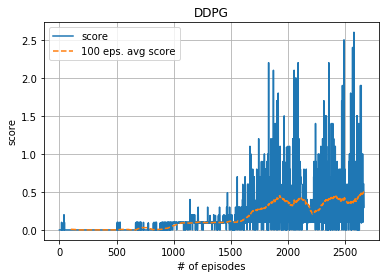

In [3]:
import matplotlib.pyplot as plt
#matplotlib inline
import numpy as np


#DDPG_score = np.genfromtxt('scores_' + str(N) + '.csv')
#DDPG_score = np.loadtxt('scores_' + str(N) + '.csv', delimiter="\n", dtype=np.float32)
DDPG_score = np.genfromtxt('scores.csv')
avg_DDPG_score = [DDPG_score[idx-100:idx].mean() for idx in range(len(DDPG_score))]


plt.plot(DDPG_score, label='score')
plt.plot(avg_DDPG_score,'--', label='100 eps. avg score')
plt.title('DDPG')
plt.xlabel('# of episodes')
plt.ylabel('score')
plt.legend()
print('it took {} episodes for the DDPG agent to solve the problem'.format(len(DDPG_score)))
    
plt.grid()
#plt.show()
 

#### The DDPG agent solved the problem with 2662 episodes 

# Ideas for Future Work

* "Swimming" in the vast space of hyperparameters is a painful job, since it takes a lot of (GPU) time to evaluate a single setting. It would be beneficial to implement an algorithm which randomizes hyperparameters (within a pre-given range) / evaluates (a little bit) / selects a nice set of hyperparameters.  

* Extending from the idea above, while automating the process of hyperparameter selecting, the performance comparison of each set could give the user (me) a "feel" of how each hyperparameter might impact the overall performance. This would useful for giving the user (again, me) some insight in reinforcement learning.

* The sensitivity to seed value seems to be an issue. (If GPU time permits) using multiple seed values to know the statistical/expected performance of the agent.

* One of the main goals of DRL is not just to find the best hyperparameters for  a single problem, but to find a set which may do generally well in many problems. Applying the same algorithm structure and same (or similar) hyperparameters to many different RL benchworks would evaluate the algorithm more thoroughly.

* (I'm not sure if this work, or already has been done but) after the actor-critic network is converged, in order to reduce computational time when in actual action, a type of transfer learning to a smaller network might be done. Finding a computationaly efficient "actor" network at the cost of training time would be justified for some instances.
